### Introduction and Problem
As a personal project, I am interested in observing crime data in Vancouver, specifically as it pertains to residential break-and-enters. This type of crime is increasingly prevalent across Vancouver, causes property damage and loss, and is creating increasing safety issues. Personally, it has happened to family members I know, as well as to my immediate neighbour.  I would like to know:
- are there specific neighbourhoods where break-and-enters are happening more than others?
- when are break-and-enters happening most often during the day?

### Dataset
The dataset was pulled from Kaggle, originally stored on the Vancouver Open Data Catalogue. It was extracted on 2017-07-18 and it contains 530,652 crime records across Vancouver from 2003-01-01 to 2017-07-13.

### Dictionary 
- `TYPE`: Type of Crime
- `YEAR`: Year when the reported crime activity occurred
- `MONTH`: Month when the reported crime activity occurred
- `DAY`: Day when the reported crime activity occurred
- `HOUR`: Hour when the reported crime activity occurred
- `MINUTE`: Minute when the reported crime activity occurred
- `HUNDRED_BLOCK`: Generalized location of the report crime activity
- `NEIGHBOURHOOD`: Neighbourhood where the reported crime activity occurred
- `X`:Coordinate values projected in UTM Zone 10
- `Y`: Coordinate values projected in UTM Zone 10
- `LATITUDE`: Latitude, converted from X
- `LONGITUDE`: Longitude, converted from Y

### Getting Started
We need to ensure each record has latitude and longitude coordinates captured, so we first need to remove rows with no latitude or longitude data.

As the dataset only ranges from 2003 to 2017, I will only use the latest data (2017). 
We want to visualize our data on maps, so we will first install the `folium` package as this helps us create leafleft maps.

In [2]:
#install folium
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 1.4 MB/s eta 0:00:00a 0:00:01


In [ ]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

#import data
df = pd.read_csv('crime.csv')

In [4]:
df

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
...,...,...,...,...,...,...,...,...,...,...,...,...
530646,Mischief,2017,1,18,14.0,44.0,14XX E HASTINGS ST,Grandview-Woodland,494563.75,5458727.40,49.281276,-123.074746
530647,Break and Enter Residential/Other,2017,3,3,9.0,16.0,31XX ADANAC ST,Hastings-Sunrise,497265.49,5458296.71,49.277420,-123.037595
530648,Mischief,2017,5,29,22.0,30.0,14XX E 7TH AVE,Grandview-Woodland,494533.97,5456824.97,49.264163,-123.075129
530650,Theft from Vehicle,2017,6,5,17.0,0.0,8XX HAMILTON ST,Central Business District,491487.85,5458385.78,49.278168,-123.117031


In [33]:
df['TYPE'].value_counts()

Theft from Vehicle                                        172700
Mischief                                                   70413
Break and Enter Residential/Other                          60862
Other Theft                                                52167
Theft of Vehicle                                           38418
Break and Enter Commercial                                 33845
Theft of Bicycle                                           25730
Vehicle Collision or Pedestrian Struck (with Injury)       21901
Vehicle Collision or Pedestrian Struck (with Fatality)       254
Name: TYPE, dtype: int64

In [35]:
(df['TYPE'].value_counts()/len(df))*100

Theft from Vehicle                                        36.259422
Mischief                                                  14.783640
Break and Enter Residential/Other                         12.778349
Other Theft                                               10.952781
Theft of Vehicle                                           8.066094
Break and Enter Commercial                                 7.105965
Theft of Bicycle                                           5.402171
Vehicle Collision or Pedestrian Struck (with Injury)       4.598249
Vehicle Collision or Pedestrian Struck (with Fatality)     0.053329
Name: TYPE, dtype: float64

The dataset shows nine crime type categories above, with vehicle thefts in the lead at ~36%, following by mischief at ~15%, then residential break-and-enters at ~13% in the top three.

In [15]:
df['YEAR'].value_counts()

2003    46403
2004    45453
2005    40871
2006    37955
2016    34615
2007    33261
2008    31170
2015    31111
2014    29492
2009    28269
2010    25947
2012    25428
2013    25386
2011    24688
2017    16241
Name: YEAR, dtype: int64

There are 16,241 crime entries in total for the year of 2017. Let's create a filtered dataset containing break and enter crimes only in the year of 2017.

In [16]:
# On use rows with geographical information for 2017
df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]

# Create a dataset of vehicle thefts in 2017
bae2017 =  df[(df['YEAR'] == 2017) & (df['TYPE'] == "Break and Enter Residential/Other")]

In [20]:
bae2017.shape

(1304, 12)

There were 1,304 break and enters recorded in 2017 across Vancouver. I would be interested to know the distribution of neighbourhoods these were happening in.

In [21]:
bae2017.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
512811,Break and Enter Residential/Other,2017,7,2,0.0,8.0,31XX E 21ST AVE,Renfrew-Collingwood,497202.00,5455409.39,49.251448,-123.038448
512823,Break and Enter Residential/Other,2017,6,22,23.0,0.0,31XX E 45TH AVE,Killarney,497104.75,5452940.47,49.229239,-123.039766
512824,Break and Enter Residential/Other,2017,4,7,16.0,30.0,31XX E 52ND AVE,Killarney,497091.16,5452146.23,49.222095,-123.039947
512828,Break and Enter Residential/Other,2017,6,8,11.0,33.0,31XX E 53RD AVE,Killarney,497112.18,5452045.56,49.221189,-123.039658
512832,Break and Enter Residential/Other,2017,6,2,10.0,0.0,31XX E 58TH AVE,Killarney,497096.50,5451595.17,49.217138,-123.039870


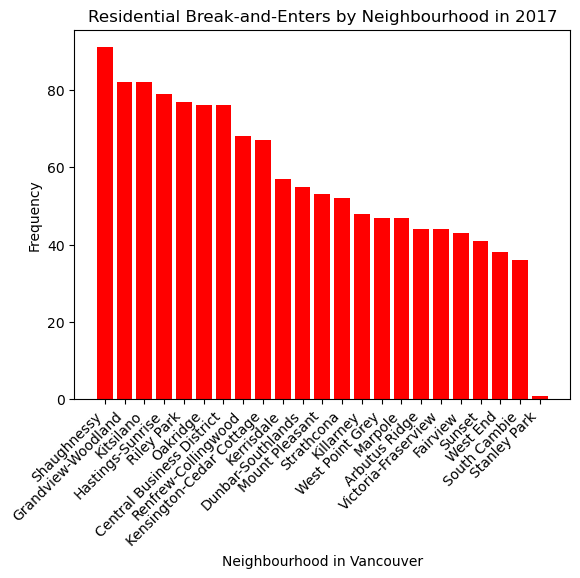

In [39]:
plt.figure()
plt.bar(bae2017['NEIGHBOURHOOD'].value_counts().index,
        bae2017['NEIGHBOURHOOD'].value_counts().values, color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Residential Break-and-Enters by Neighbourhood in 2017')
plt.ylabel('Frequency')
plt.xlabel('Neighbourhood in Vancouver')
plt.show()

Interestingly, Shaughnessy recorded the most amount of break and enters. It is a relatively wealthy neighbourhood with high average income levels, so it is not a surprise. As a resident of Riley Park, I'm concerned that we are in the top 5! 

**Limitation**: We should remember that not all crimes are reported and recorded, so this data is limited and may not be fully accurate.

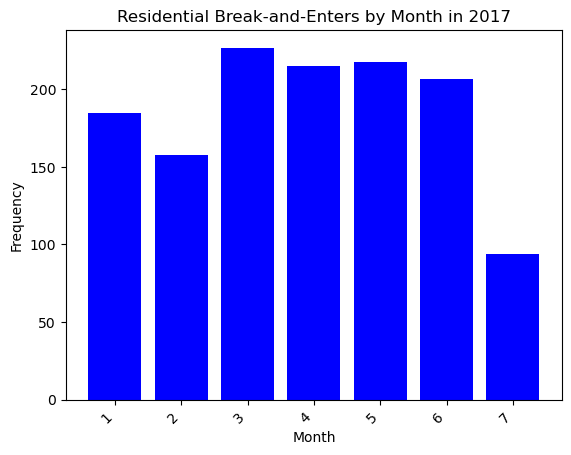

In [40]:
plt.figure()
plt.bar(bae2017['MONTH'].value_counts().index,
        bae2017['MONTH'].value_counts().values, color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Residential Break-and-Enters by Month in 2017')
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.show()

We notice that the data is incomplete for the year of 2017, nonetheless a sharp decrease in residential break-and-enters into the summer from June to July. Activity was highest in the month of March and the following spring months. 

We can plot our geo coordinates onto a heat map to observe where residential break-and-enters are happening most in Vancouver, using `folium`. Let's test this by plotting our data below.

In [17]:
#Create a map centered on Vancouver
map_van = folium.Map(location= [49.24, -123.11], zoom_start = 12)

#Create a list with lat and long values and add the list to a heat map, then show map
heat_data = [[row['Latitude'],row['Longitude']] for index, row in bae2017.iterrows()]
HeatMap(heat_data).add_to(map_van)

map_van

We can specify and observe what hours over the course of the day are activity the highest by creating a filtered dataset with grouping.

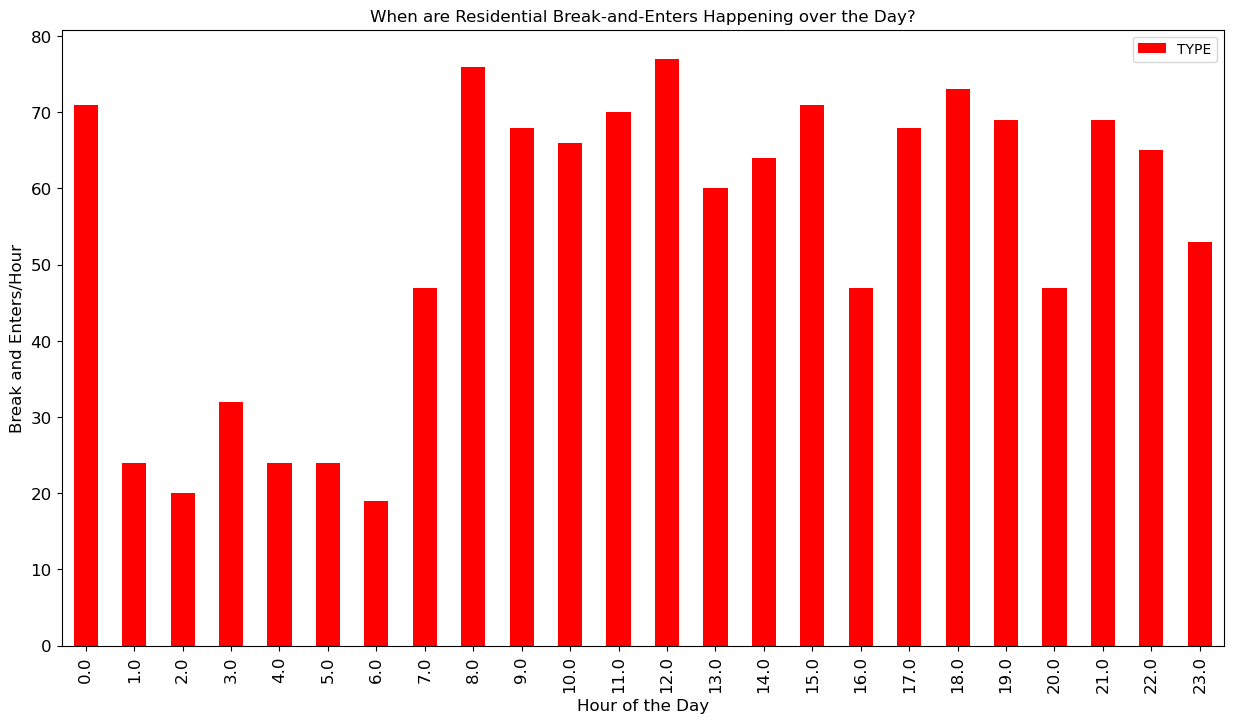

In [50]:
#Create a dataset of counts per hour 
veh_hour = bae2017[['TYPE','HOUR']].groupby(['HOUR'],as_index=False).count()

ax = veh_hour.plot(kind='bar', color='red',x='HOUR', title ='When are Residential Break-and-Enters Happening over the Day?', figsize=(15, 8), fontsize=12,legend=True,)
ax.set_xlabel("Hour of the Day", fontsize=12)
ax.set_ylabel("Break and Enters/Hour", fontsize=12)
plt.show()

It looks like popular hours are in the middle of day right at noon, followed by early in the morning at 8am. They fluctuate throughout the day but there is definitely more activity during the afternoon and late evening up to midnight. Overnight there is quieter activity. We will plot this back to our folium map to see where in Vancouver residential break-and-enters occuring most during noon.

In [31]:
map_van_bae = folium.Map(location= [49.24, -123.11], zoom_start = 12)

# Create a dataset for 2017 vehicle thefts at 12pm (the worst time for thefts)
bae2017_12 =  bae2017[(bae2017['HOUR'] == 12)]

# Create a list with lat and long values and add the list to a heat map, then show map
heat_data = [[row['Latitude'],row['Longitude']] for index, row in bae2017_12.iterrows()]
HeatMap(heat_data).add_to(map_van_bae)

map_van_bae

It looks like activity is highest in the Kensington-Cedar Cottage neighbourhood during noon. This is followed by downtown, Kitsilano, Oakridge, Strathcona, and others in yellow.

### Summary
As our dataset had geopoint data, it was interesting to plot them onto a heat map to observe the prevalence of crime across the city at the most active time of the day. 

We learned that no neighbourhood is exempt from break and enter crimes, with most happening in the Shaughnessy neighbourhood, followed by Grandview-Woodland, Kitsilano, Hastings Sunrise, and Riley Park in the top 5. These crimes happen throughout the day, even in broad daylight. 

This data would be helpful for Vancouver residents to know so they can be more aware, take measures to protect their home and possibly prevent future crime. For example, this data may prompt homeowners to:
- install alarm/security systems if they have not already;
- store valuables in their garage and not outside in their back or front yards;
- install security lights near doors and entranceways as they have been proven to decrease the risk of a break-and-enter, even when the homeowner not home;
- and more...

For police, the city, and policymakers, this can be useful data to inform police patrol efficiency and communication and education strategies to better inform and protect Vancouver residents.

Further analysis could look at characteristics of the neighbourhood and household data including average income levels, demographic composition including age and single/married/family, and more to build models and predict likelihood of a residential break-and-enter to occur or type of crime to occur. 
